<a href="https://colab.research.google.com/github/HecVelaz/Juego2D/blob/main/IA_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

**[1] Cargar el conjunto de datos en un DataFrame.**

In [ ]:
df=pd.read_csv('/content/sample_data/sales_data.csv')

**[2] Imprima las primeras filas del conjunto de datos para entender su estructura.**


In [ ]:
df

,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount
0,2023-01-21,1003,West,0,4033.98
1,2023-02-24,1003,East,39,122.70
2,2023-01-06,1055,South,27,1734.15
3,2023-04-02,1024,East,36,2051.03
4,2023-03-22,1066,South,29,2733.24
...,...,...,...,...,...
95,2023-03-21,1039,West,0,2237.02
96,2023-04-05,1082,East,47,-1542.88
97,2023-03-16,1041,North,9,4747.42
98,2023-01-16,1040,West,9,-3841.67


In [ ]:
for i in range(3):
  print('\n')
  print('Infomacion de la Fila '+ str(i) )
  print(df.iloc[i])



Infomacion de la Fila 0
Date              2023-01-21
Product_ID              1003
Store_Location          West
Units_Sold                 0
Sales_Amount         4033.98
Name: 0, dtype: object


Infomacion de la Fila 1
Date              2023-02-24
Product_ID              1003
Store_Location          East
Units_Sold                39
Sales_Amount           122.7
Name: 1, dtype: object


Infomacion de la Fila 2
Date              2023-01-06
Product_ID              1055
Store_Location         South
Units_Sold                27
Sales_Amount         1734.15
Name: 2, dtype: object


In [ ]:
print(df.head(3))

         Date  Product_ID Store_Location  Units_Sold  Sales_Amount
0  2023-01-21        1003           West           0       4033.98
1  2023-02-24        1003           East          39        122.70
2  2023-01-06        1055          South          27       1734.15


**[3] Compruebe y resuma cualquier valor faltante o NaN en cada columna.**

In [ ]:

i = 0
for column in df.columns:
    for index, value in df[column].items():
        if pd.isnull(value):
            print("Hay nulo en la fila:", index+2, "y columna:", column)
            i += 1

print("Total de valores nulos encontrados:", i)
df.isnull().sum()

Hay nulo en la fila: 20 y columna: Store_Location
Hay nulo en la fila: 25 y columna: Store_Location
Hay nulo en la fila: 34 y columna: Store_Location
Hay nulo en la fila: 64 y columna: Store_Location
Total de valores nulos encontrados: 4


Date              0
Product_ID        0
Store_Location    4
Units_Sold        0
Sales_Amount      0
dtype: int64

**[4] Rellene los valores perdidos en Units_Sold con el valor medio de la columna.**


In [ ]:
# Calcular la media de 'Units_Sold'
#media = df['Units_Sold'].mean()
#print(media)
#df.loc[df['Units_Sold'] == 0, 'Units_Sold'] = media

# Imprimir las filas donde se realizaron cambios
#changed_rows = df[df['Units_Sold'] == media]
#print("Filas donde se reemplazaron los valores '0' con la media:")
#print(changed_rows)
media = df['Units_Sold'].mean()
df['Units_Sold'].fillna(media, inplace=True)
df['Units_Sold'].replace(0, media, inplace=True)
df

,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount
0,2023-01-21,1003,West,24.56,4033.98
1,2023-02-24,1003,East,39.00,122.70
2,2023-01-06,1055,South,27.00,1734.15
3,2023-04-02,1024,East,36.00,2051.03
4,2023-03-22,1066,South,29.00,2733.24
...,...,...,...,...,...
95,2023-03-21,1039,West,24.56,2237.02
96,2023-04-05,1082,East,47.00,-1542.88
97,2023-03-16,1041,North,9.00,4747.42
98,2023-01-16,1040,West,9.00,-3841.67


**[5] Elimine las filas en Sales_Amount q sea negativo o Store_Location falte.**


In [ ]:
df = df[(df['Sales_Amount'] >= 0) & df['Store_Location'].notna()]

df

,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount
0,2023-01-21,1003,West,24.56,4033.98
1,2023-02-24,1003,East,39.00,122.70
2,2023-01-06,1055,South,27.00,1734.15
3,2023-04-02,1024,East,36.00,2051.03
4,2023-03-22,1066,South,29.00,2733.24
...,...,...,...,...,...
93,2023-01-23,1033,South,40.00,2106.12
94,2023-02-24,1007,South,15.00,2805.03
95,2023-03-21,1039,West,24.56,2237.02
97,2023-03-16,1041,North,9.00,4747.42


**[6] Añada una nueva columna Sale_Price_Per_Unit dividiendo Sales_Amount por Units_Sold.**

In [ ]:
df['Sale_Price_Per_Unit'] = df['Sales_Amount'] / df['Units_Sold']

df

<ipython-input-240-98e1e0e0402a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sale_Price_Per_Unit'] = df['Sales_Amount'] / df['Units_Sold']


,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sale_Price_Per_Unit
0,2023-01-21,1003,West,24.56,4033.98,164.250000
1,2023-02-24,1003,East,39.00,122.70,3.146154
2,2023-01-06,1055,South,27.00,1734.15,64.227778
3,2023-04-02,1024,East,36.00,2051.03,56.973056
4,2023-03-22,1066,South,29.00,2733.24,94.249655
...,...,...,...,...,...,...
93,2023-01-23,1033,South,40.00,2106.12,52.653000
94,2023-02-24,1007,South,15.00,2805.03,187.002000
95,2023-03-21,1039,West,24.56,2237.02,91.083876
97,2023-03-16,1041,North,9.00,4747.42,527.491111


**[7] Convertir la columna Date a un objeto DateTime en pandas.**

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df

<ipython-input-241-6318001ca589>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sale_Price_Per_Unit
0,2023-01-21,1003,West,24.56,4033.98,164.250000
1,2023-02-24,1003,East,39.00,122.70,3.146154
2,2023-01-06,1055,South,27.00,1734.15,64.227778
3,2023-04-02,1024,East,36.00,2051.03,56.973056
4,2023-03-22,1066,South,29.00,2733.24,94.249655
...,...,...,...,...,...,...
93,2023-01-23,1033,South,40.00,2106.12,52.653000
94,2023-02-24,1007,South,15.00,2805.03,187.002000
95,2023-03-21,1039,West,24.56,2237.02,91.083876
97,2023-03-16,1041,North,9.00,4747.42,527.491111


**[8] Agregue los datos para encontrar el total de Units_Sold y el Sales_Amount por Store_Location.**


In [ ]:
totales_por_locacion = df.groupby('Store_Location').agg({'Units_Sold': 'sum', 'Sales_Amount': 'sum'})

totales_por_locacion

,Units_Sold,Sales_Amount
Store_Location,,
East,714.24,47874.32
North,661.12,45718.99
South,427.56,36880.54
West,587.68,60460.87


**[9] Agrupe los datos por mes y calcule las ventas totales de cada mes para identificar tendencias a lo largo del tiempo.**

In [ ]:
# Establecer la columna 'Date' como índice del DataFrame
df.set_index('Date', inplace=True)

# Agrupar los datos por mes y calcular las ventas totales de cada mes
monthly_sales = df.resample('M').sum()

# Imprimir el resultado
print(monthly_sales)


            Product_ID  Units_Sold  Sales_Amount  Sale_Price_Per_Unit
Date                                                                 
2023-01-31       26079      631.56      52579.14          4828.576818
2023-02-28       26103      731.56      46416.88          2359.344245
2023-03-31       30434      786.92      74185.82          4207.183523
2023-04-30        9440      240.56      17752.88          1033.243562


<ipython-input-243-7e97765dca23>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df.resample('M').sum()


**[10] Identifique los 5 productos más vendidos (por Units_Sold).**


In [ ]:
######################################
product_sales = df.groupby('Product_ID')['Units_Sold'].sum()
Productos=product_sales.sort_values(ascending=False).head(5)
Productos

Product_ID
1085    143.56
1055    111.00
1025     88.00
1024     84.00
1066     75.00
Name: Units_Sold, dtype: float64

**[11] Escribir una función Python para calcular la varianza de ventas de cada producto.**


In [ ]:
#######################################
def varianza(df):
   v = df.groupby('Product_ID')['Sales_Amount'].var()
   return v
# Llamar a la función y almacenar el resultado en una variable
varianza_ventas_por_producto = varianza(df)

# Imprimir el resultado
print("Varianza de ventas por producto:")
varianza_ventas_por_producto

Varianza de ventas por producto:


Product_ID
1000             NaN
1001             NaN
1002             NaN
1003    7.649056e+06
1004    8.768588e+05
            ...     
1091             NaN
1092             NaN
1093             NaN
1095             NaN
1098    2.336818e+05
Name: Sales_Amount, Length: 62, dtype: float64

**[1] Generar un histograma de Sales_Amount para visualizar la distribución de los valores de ventas.**


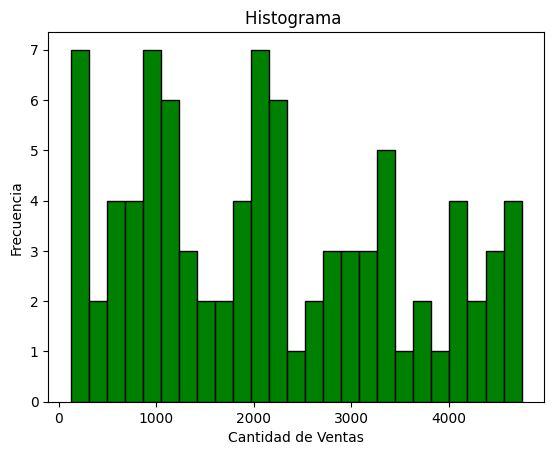

In [ ]:
import matplotlib.pyplot as plt
# Crear el histograma de Sales_Amount
plt.hist(df['Sales_Amount'], bins=25, color='green', edgecolor='black')
# Agregar etiquetas y título
plt.xlabel('Cantidad de Ventas')
plt.ylabel('Frecuencia')
plt.title('Histograma ')
# Mostrar el histograma
plt.show()

**[2] Crear un gráfico de líneas que muestre las tendencias de ventas mensuales.**

<ipython-input-253-9afee232bc5d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df.resample('M').sum()


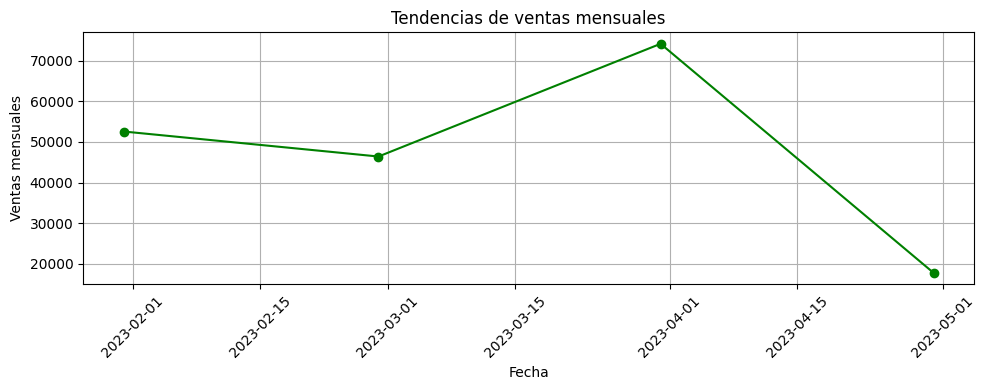

In [ ]:
import matplotlib.pyplot as plt
# Agrupar los datos por mes y sumar las ventas mensuales
monthly_sales = df.resample('M').sum()
# Crear el gráfico de líneas
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales.index, monthly_sales['Sales_Amount'], marker='o', color='green', linestyle='-')
# Agregar etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Ventas mensuales')
plt.title('Tendencias de ventas mensuales')
# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)
# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

**[1] Crear una matriz en base a Product_ID, Units_Sold y Sales_Amount.**

In [ ]:
import numpy as np
matriz = np.column_stack((df['Product_ID'], df['Units_Sold'], df['Sales_Amount']))
# Imprimir la matriz resultante
print("Matriz resultante:")
print(matriz)

**[2] Extraer como vector 1D el Product_ID y filtrar los ID duplicados.**

In [ ]:
Id_products = df['Product_ID'].values
# Filtro ID duplicados
unique_product_ids = np.unique(Id_products)
# Imprimir los ID únicos
print("Product_ID únicos:")
print(unique_product_ids)

Product_ID únicos:
[1000 1001 1002 1003 1004 1005 1006 1007 1009 1011 1012 1013 1014 1016
 1017 1018 1020 1021 1022 1024 1025 1026 1027 1031 1033 1037 1038 1039
 1041 1043 1046 1047 1048 1049 1050 1051 1055 1056 1058 1060 1062 1063
 1066 1067 1069 1072 1073 1077 1078 1080 1081 1083 1085 1086 1087 1088
 1089 1091 1092 1093 1095 1098]


**[2] Calcule la media, la mediana y la desviación estándar de Sales_Amount para comprender la distribución de las ventas.**

In [ ]:
media_sales_amount = np.mean(df['Sales_Amount'])

# Calcular la mediana de Sales_Amount
mediana_sales_amount = np.median(df['Sales_Amount'])

# Calcular la desviación estándar de Sales_Amount
std_sales_amount = np.std(df['Sales_Amount'])

# Imprimir los resultados
print("Media de Sales_Amount:", media_sales_amount)
print("Mediana de Sales_Amount:", mediana_sales_amount)
print("Desviación estándar de Sales_Amount:", std_sales_amount)

Media de Sales_Amount: 2169.712727272727
Mediana de Sales_Amount: 2083.27
Desviación estándar de Sales_Amount: 1345.8575865534478


**[3] Normalice Sales_Amount de modo que oscilen exactamente entre 0 y 1 para comparar el rendimiento de las ventas entre productos de diferentes escalas.**

In [ ]:
# Normalizar Sales_Amount entre 0 y 1
min_sales_amount = df['Sales_Amount'].min()
max_sales_amount = df['Sales_Amount'].max()
df['Sales_Amount_Normalized'] = (df['Sales_Amount'] - min_sales_amount) / (max_sales_amount - min_sales_amount)

# Imprimir el DataFrame con la columna normalizada
df

<ipython-input-252-7da3a3fb3ad3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales_Amount_Normalized'] = (df['Sales_Amount'] - min_sales_amount) / (max_sales_amount - min_sales_amount)


,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sale_Price_Per_Unit,Sales_Amount_Normalized
Date,,,,,,
2023-01-21,1003,West,24.56,4033.98,164.250000,0.845733
2023-02-24,1003,East,39.00,122.70,3.146154,0.000000
2023-01-06,1055,South,27.00,1734.15,64.227778,0.348443
2023-04-02,1024,East,36.00,2051.03,56.973056,0.416961
2023-03-22,1066,South,29.00,2733.24,94.249655,0.564475
...,...,...,...,...,...,...
2023-01-23,1033,South,40.00,2106.12,52.653000,0.428874
2023-02-24,1007,South,15.00,2805.03,187.002000,0.579998
2023-03-21,1039,West,24.56,2237.02,91.083876,0.457178


**[4] Encontrar el ID de producto con la mayor frecuencia de ventas para centrarse en la optimización de su inventario.**


In [ ]:
id_mas_vendido = df['Product_ID'].value_counts().idxmax()

# Imprimir el ID de producto más vendido
print("ID de producto con la mayor frecuencia de ventas:", id_mas_vendido)

ID de producto con la mayor frecuencia de ventas: 1055


**[5] Ordene el conjunto de datos en función del importe de las ventas en orden descendente para dar prioridad a las transacciones de alto valor para su posterior análisis.**


In [ ]:
df_sorted = df.sort_values(by='Sales_Amount', ascending=False)

# Imprimir el conjunto de datos ordenado
print("Conjunto de datos ordenado en función del importe de las ventas en orden descendente:")
df_sorted

Conjunto de datos ordenado en función del importe de las ventas en orden descendente:


,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sale_Price_Per_Unit,Sales_Amount_Normalized
Date,,,,,,
2023-03-16,1041,North,9.00,4747.42,527.491111,1.000000
2023-03-26,1051,East,23.00,4735.97,205.911739,0.997524
2023-03-10,1095,West,38.00,4607.29,121.244474,0.969700
2023-01-17,1081,North,33.00,4582.74,138.870909,0.964391
2023-01-26,1026,East,2.00,4500.47,2250.235000,0.946602
...,...,...,...,...,...,...
2023-03-15,1043,East,22.00,230.01,10.455000,0.023204
2023-02-07,1013,South,24.56,224.39,9.136401,0.021988
2023-01-01,1021,East,47.00,164.16,3.492766,0.008965


**[6] Asegúrese de que todos los números de coma flotante del informe tengan un formato con dos decimales para garantizar la coherencia.**


In [ ]:
df_rounded = df.round(2)

# Formatear los números redondeados como cadenas con dos decimales
df_formatted = df_rounded.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, float) else x)

# Imprimir el DataFrame con los números de coma flotante formateados
print("Informe con números de coma flotante formateados con dos decimales:")
df_formatted

Informe con números de coma flotante formateados con dos decimales:


,Product_ID,Store_Location,Units_Sold,Sales_Amount,Sale_Price_Per_Unit,Sales_Amount_Normalized
Date,,,,,,
2023-01-21,1003,West,24.56,4033.98,164.25,0.85
2023-02-24,1003,East,39.00,122.70,3.15,0.00
2023-01-06,1055,South,27.00,1734.15,64.23,0.35
2023-04-02,1024,East,36.00,2051.03,56.97,0.42
2023-03-22,1066,South,29.00,2733.24,94.25,0.56
...,...,...,...,...,...,...
2023-01-23,1033,South,40.00,2106.12,52.65,0.43
2023-02-24,1007,South,15.00,2805.03,187.00,0.58
2023-03-21,1039,West,24.56,2237.02,91.08,0.46
